## 1. Preparasi

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#buat fungsi untuk reduce memory.
#intinya adalah iterasi keseluruh kolom pada dataframe dan mengubah datatype yg memorynya paling kecil.
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#fungsi untuk memanggil dataframe
def import_data(file):
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
data = import_data('G:\\Bootcamp\\Materi\\28. NoSQL\\home credit\\data\\data_final.csv')

Memory usage of dataframe is 834.43 MB
Memory usage after optimization is: 226.95 MB
Decreased by 72.8%


In [4]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [5]:
data.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,TARGET
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.014900,64815.0,51934,0.972168,0.972168,0.972168,0.619141,0.624512,0.634277,1.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.071411,9253.0,50714,0.984863,0.984863,0.984863,0.795898,0.798828,0.804199,0.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068970,64815.0,50714,0.981445,0.981445,0.981445,0.755371,0.758301,0.764648,0.0
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.068970,64815.0,51934,0.981445,0.981445,0.981445,0.755371,0.758301,0.764648,0.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068970,64815.0,50591,0.981445,0.981445,0.981445,0.755371,0.758301,0.764648,0.0


In [6]:
#split ke data training dan testing
#karena yang akan divisualisasi hanya data training
data_train = data[:307511]

In [7]:
data_train.shape

(307511, 305)

In [8]:
data_test = data[307511:]

In [9]:
data_test.shape

(48744, 305)

## 2. Visualisasi Data Training

In [10]:
data_train.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,TARGET
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.014900,64815.0,51934,0.972168,0.972168,0.972168,0.619141,0.624512,0.634277,1.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.071411,9253.0,50714,0.984863,0.984863,0.984863,0.795898,0.798828,0.804199,0.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068970,64815.0,50714,0.981445,0.981445,0.981445,0.755371,0.758301,0.764648,0.0
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.068970,64815.0,51934,0.981445,0.981445,0.981445,0.755371,0.758301,0.764648,0.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068970,64815.0,50591,0.981445,0.981445,0.981445,0.755371,0.758301,0.764648,0.0


In [11]:
for columns in data_train.columns:
    print(columns)

AMT_ANNUITY
AMT_CREDIT
AMT_GOODS_PRICE
AMT_INCOME_TOTAL
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_YEAR
APARTMENTS_AVG
APARTMENTS_MEDI
APARTMENTS_MODE
BASEMENTAREA_AVG
BASEMENTAREA_MEDI
BASEMENTAREA_MODE
Bureau_AMT_ANNUITY
Bureau_AMT_CREDIT_MAX_OVERDUE
Bureau_AMT_CREDIT_SUM
Bureau_AMT_CREDIT_SUM_DEBT
Bureau_AMT_CREDIT_SUM_LIMIT
Bureau_AMT_CREDIT_SUM_OVERDUE
Bureau_Balance_MONTHS_BALANCE
Bureau_Balance_STATUS_0
Bureau_Balance_STATUS_1
Bureau_Balance_STATUS_5
Bureau_Balance_STATUS_C
Bureau_Balance_STATUS_X
Bureau_CNT_CREDIT_PROLONG
Bureau_CREDIT_ACTIVE
Bureau_CREDIT_CURRENCY
Bureau_CREDIT_DAY_OVERDUE
Bureau_CREDIT_TYPE
Bureau_DAYS_CREDIT
Bureau_DAYS_CREDIT_ENDDATE
Bureau_DAYS_CREDIT_UPDATE
Bureau_DAYS_ENDDATE_FACT
CNT_CHILDREN
CNT_FAM_MEMBERS
CODE_GENDER
COMMONAREA_AVG
COMMONAREA_MEDI
COMMONAREA_MODE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE
DAYS_REGISTRATI

### 2.1 Distribusi dari Target

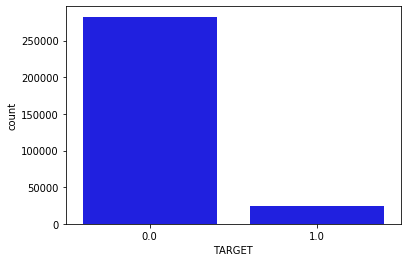

In [12]:
sns.countplot(data_train['TARGET'], color='blue')

- Dari data diatas dapat dilihat bahwa target imbalance.
- perlu dilakukan treatment sebelum modelling.

### 2.2 Distribusi dari Gender

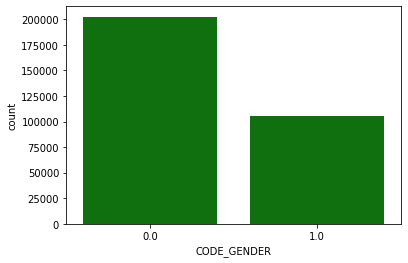

In [14]:
sns.countplot(data_train['CODE_GENDER'], color='green')

- Nilai 0 untuk wanita dan 1 untuk laki-laki.
- Dapat dilihat ternyata wanita lebih banyak meminjam credit dari laki-laki.

## 2.3 Distribusi dari Income Total Client

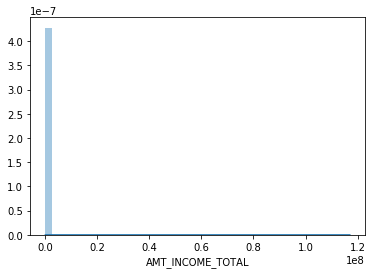

In [15]:
sns.distplot(data_train['AMT_INCOME_TOTAL'])

- Dari plot diatas ternyata ada outlier di dalam feature income total client

### 2.4 Distribusi dari Jumlah Credit

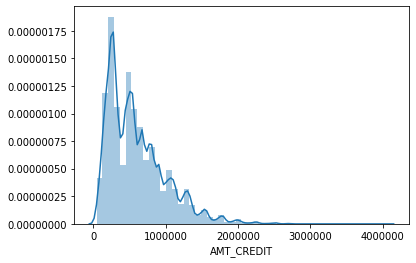

In [20]:
sns.distplot(data_train['AMT_CREDIT'])

- Jumlah credit lebih banyak dibawah angka 1000000.

### 2.5 Distribusi dari Jumlah Loan Annuity

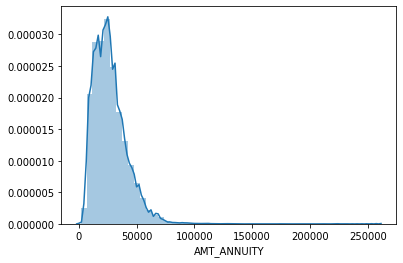

In [21]:
sns.distplot(data_train['AMT_ANNUITY'])

- Rata - rata peminjam membayar tagihan dibawah angka 50000

### 2.6 Distribusi dari Education Type

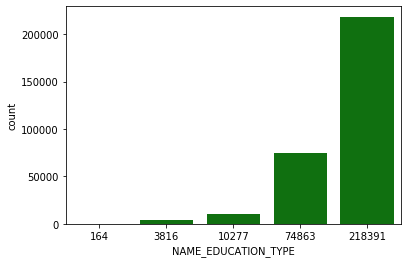

In [24]:
sns.countplot(data_train['NAME_EDUCATION_TYPE'], color='green')

- Nilai 218391 adalah untuk secondary school yang paling banyak
- Sedangkan nilai 164 adalah untuk Academic degree yang paling kecil

### 2.7 Distribusi dari Income Type

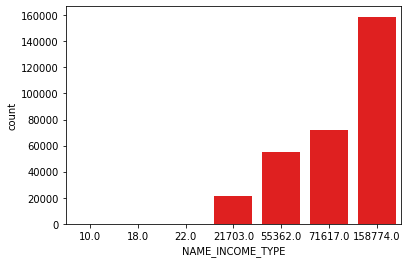

In [27]:
sns.countplot(data_train['NAME_INCOME_TYPE'], color='red')

- Nilai dari 158774 itu adalah working yang jumlahnya paling banyak.
- Sedangkan untuk nilai 10 adalah businessman yang nilainya paling kecil.